In [1]:

# ----- Qick package ----- #
from qick import *
from qick.pyro import make_proxy
# for now, all the tProc v2 classes need to be individually imported (can't use qick.*)
# the main program class
from qick.asm_v2 import AveragerProgramV2
# for defining sweeps
from qick.asm_v2 import QickSpan, QickSweep1D
# ----- Library ----- #
import matplotlib.pyplot as plt
import numpy as np
import datetime
from singleshotplot import hist
from system_cfg import *
from system_tool import select_config_idx, saveshot, get_next_filename
from pprint import pprint
# ----- Experiment configurations ----- #
expt_name = "000_SingleShot_gef"
QubitIndex = 0
Qubit = 'Q' + str(QubitIndex)
config = select_config_idx(
    hw_cfg, readout_cfg, qubit_cfg, expt_cfg, idx=QubitIndex)

Pyro.NameServer PYRO:Pyro.NameServer@0.0.0.0:8888
myqick PYRO:obj_5066684d49f8485e87911389de1ad38e@192.168.10.165:42649
QICK running on ZCU216, software version 0.2.302

Firmware configuration (built Tue Sep 10 16:13:40 2024):

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	16 signal generator channels:
	0:	axis_signal_gen_v6 - envelope memory 16384 samples (1.709 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 2, blk 0 is 0_230, on JHC3
	1:	axis_signal_gen_v6 - envelope memory 4096 samples (0.427 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 2, blk 1 is 1_230, on JHC4
	2:	axis_signal_gen_v6 - envelope memory 8192 samples (0.855 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 2, blk 2 is 2_230, on JHC3
	3:	axis_signal_gen_v6 - envelope memory 4096 samples (0.427 us)
		fs=9584.640 MHz, fabric=599.040 MHz, 32-bit DDS, range=9584.640 MHz
		DAC tile 2, blk 3 is

In [2]:
from SingleShot_prog import SingleShot_gef
ss = SingleShot_gef(soccfg, config)

In [5]:
Shots = 5000
config.update([('shots', Shots)])
ss.run(shot_f=False)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

g unrotated averages:
I -1.9472514657980453 +/- 0.09516043674875901 	 Q -7.097593485342019 +/- 0.09526119164697348 	 Amp 7.36048329545162 +/- 0.09506531941783015
Rotated (theta=-1.1111809540039281):
I -7.22483527001701 +/- 0.09492057321976143 	 Q -1.4033448882367943 +/- 0.09550019966391633 	 Amp 7.359865593488926 +/- 0.09506531941783015
e unrotated averages:
I -1.9469309446254068 +/- 0.09412952752750449 	 Q -7.096945928338761 +/- 0.09325320155928571 	 Amp 7.359766414905771 +/- 0.09260917061928829
Rotated (theta=-1.1111809540039281):
I -7.224112730125671 +/- 0.09233731604837916 	 Q -1.4033448882367932 +/- 0.09502814119296309 	 Amp 7.359156311215581 +/- 0.09260917061928829
g unrotated averages:
I -1.9472514657980453 +/- 0.09516043674875901 	 Q -7.097593485342019 +/- 0.09526119164697348 	 Amp 7.359865593488926
Attempted to init fitparam 1 to -7.2210983296467885, which is out of bounds -7.589611648151379 to -7.230130518825823. Instead init to -7.409871083488602
e unrotated averages:
I -1.9

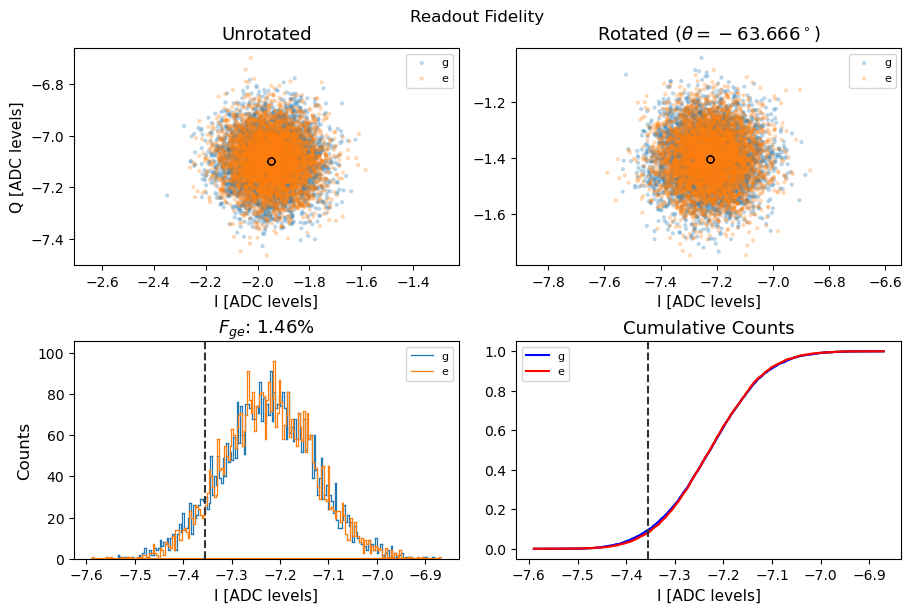

In [6]:
ss.plot()